In [1]:
# %matplotlib notebook

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import scipy.stats as st
from scipy.stats import linregress
import gmaps
from config import g_key

# Must enable gmaps extension to display interactive gmaps in jupyter notebook
# jupyter nbextension enable --py gmaps

In [3]:
raw_data_filepath = "../data_raw/Per Capita Alcohol Consumption 1977_2018.csv"
per_capita_df = pd.read_csv(raw_data_filepath, delimiter=",")
per_capita_df

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,2018,1.04,0.26,0.69,1.99,246.518518,51.596899,143.260341,424.533333
1,alabama,2017,1.07,0.26,0.67,1.99,253.629630,51.596899,139.107867,424.533333
2,alabama,2016,1.09,0.26,0.65,2.01,258.370370,51.596899,134.955393,428.800000
3,alabama,2015,1.11,0.26,0.64,2.01,263.111111,51.596899,132.879156,428.800000
4,alabama,2014,1.13,0.25,0.62,2.00,267.851852,49.612403,128.726683,426.666667
...,...,...,...,...,...,...,...,...,...,...
2347,us total,1981,1.39,0.35,1.02,2.76,329.481481,69.457364,211.776156,588.800000
2348,us total,1980,1.37,0.34,1.04,2.75,324.740741,67.472868,215.928629,586.666667
2349,us total,1979,1.34,0.31,1.04,2.70,317.629630,61.519380,215.928629,576.000000
2350,us total,1978,1.30,0.30,1.05,2.66,308.148148,59.534884,218.004866,567.466667


In [4]:
per_capita_df.columns = ['State', 
                         'Year', 
                         'Beer (Ethanol Gallons Per Capita)', 
                         'Wine (Ethanol Gallons Per Capita)', 
                         'Spirit (Ethanol Gallons Per Capita)', 
                         'All Drinks (Ethanol Gallons Per Capita)', 
                         'Number of Beers', 
                         'Number of Glasses of Wine', 
                         'Number of Shots Liquor', 
                         'Total Number of Drinks']

print(list(per_capita_df.columns.values))
per_capita_df

['State', 'Year', 'Beer (Ethanol Gallons Per Capita)', 'Wine (Ethanol Gallons Per Capita)', 'Spirit (Ethanol Gallons Per Capita)', 'All Drinks (Ethanol Gallons Per Capita)', 'Number of Beers', 'Number of Glasses of Wine', 'Number of Shots Liquor', 'Total Number of Drinks']


,State,Year,Beer (Ethanol Gallons Per Capita),Wine (Ethanol Gallons Per Capita),Spirit (Ethanol Gallons Per Capita),All Drinks (Ethanol Gallons Per Capita),Number of Beers,Number of Glasses of Wine,Number of Shots Liquor,Total Number of Drinks
0,alabama,2018,1.04,0.26,0.69,1.99,246.518518,51.596899,143.260341,424.533333
1,alabama,2017,1.07,0.26,0.67,1.99,253.629630,51.596899,139.107867,424.533333
2,alabama,2016,1.09,0.26,0.65,2.01,258.370370,51.596899,134.955393,428.800000
3,alabama,2015,1.11,0.26,0.64,2.01,263.111111,51.596899,132.879156,428.800000
4,alabama,2014,1.13,0.25,0.62,2.00,267.851852,49.612403,128.726683,426.666667
...,...,...,...,...,...,...,...,...,...,...
2347,us total,1981,1.39,0.35,1.02,2.76,329.481481,69.457364,211.776156,588.800000
2348,us total,1980,1.37,0.34,1.04,2.75,324.740741,67.472868,215.928629,586.666667
2349,us total,1979,1.34,0.31,1.04,2.70,317.629630,61.519380,215.928629,576.000000
2350,us total,1978,1.30,0.30,1.05,2.66,308.148148,59.534884,218.004866,567.466667


In [5]:
states_regions = per_capita_df['State'].unique()
states_regions

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district of columbia',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana',
       'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'mississippi',
       'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire',
       'new jersey', 'new mexico', 'new york', 'north carolina',
       'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode island', 'south carolina', 'south dakota', 'tennessee',
       'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west virginia', 'wisconsin', 'wyoming', 'northeast region',
       'midwest region', 'south region', 'west region', 'us total'],
      dtype=object)

In [6]:
regions = ['northeast region', 'midwest region', 'south region', 'west region']

In [7]:
states = ['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district of columbia',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana',
       'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'mississippi',
       'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire',
       'new jersey', 'new mexico', 'new york', 'north carolina',
       'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode island', 'south carolina', 'south dakota', 'tennessee',
       'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west virginia', 'wisconsin', 'wyoming']

len(states)

51

In [8]:
totals = ['us total']

In [9]:
per_capita_df['Year'].nunique()
years = list(per_capita_df['Year'].unique())
# years

In [10]:
# Break out US totals

totals_1977_2018_df = per_capita_df[per_capita_df['State'].isin(totals)]
us_totals_df = totals_1977_2018_df.set_index(['Year']).sort_index(ascending=True)

print(us_totals_df.count())
us_totals_df.head()

State                                      42
Beer (Ethanol Gallons Per Capita)          42
Wine (Ethanol Gallons Per Capita)          42
Spirit (Ethanol Gallons Per Capita)        42
All Drinks (Ethanol Gallons Per Capita)    42
Number of Beers                            42
Number of Glasses of Wine                  42
Number of Shots Liquor                     42
Total Number of Drinks                     42
dtype: int64


,State,Beer (Ethanol Gallons Per Capita),Wine (Ethanol Gallons Per Capita),Spirit (Ethanol Gallons Per Capita),All Drinks (Ethanol Gallons Per Capita),Number of Beers,Number of Glasses of Wine,Number of Shots Liquor,Total Number of Drinks
Year,,,,,,,,,
1977,us total,1.27,0.29,1.04,2.60,301.037037,57.550388,215.928629,554.666667
1978,us total,1.30,0.30,1.05,2.66,308.148148,59.534884,218.004866,567.466667
1979,us total,1.34,0.31,1.04,2.70,317.629630,61.519380,215.928629,576.000000
1980,us total,1.37,0.34,1.04,2.75,324.740741,67.472868,215.928629,586.666667
1981,us total,1.39,0.35,1.02,2.76,329.481481,69.457364,211.776156,588.800000


In [11]:
# Break out Region Totals

regions_df = per_capita_df[per_capita_df['State'].isin(regions)]
# regions_df = regions_1977_2018_df.set_index(['State', 'Year'])

print(regions_df.count())
regions_df.head()

State                                      168
Year                                       168
Beer (Ethanol Gallons Per Capita)          168
Wine (Ethanol Gallons Per Capita)          168
Spirit (Ethanol Gallons Per Capita)        168
All Drinks (Ethanol Gallons Per Capita)    168
Number of Beers                            168
Number of Glasses of Wine                  168
Number of Shots Liquor                     168
Total Number of Drinks                     168
dtype: int64


,State,Year,Beer (Ethanol Gallons Per Capita),Wine (Ethanol Gallons Per Capita),Spirit (Ethanol Gallons Per Capita),All Drinks (Ethanol Gallons Per Capita),Number of Beers,Number of Glasses of Wine,Number of Shots Liquor,Total Number of Drinks
2142,northeast region,2018,1.00,0.51,0.90,2.41,237.037037,101.209302,186.861314,514.133333
2143,northeast region,2017,1.02,0.53,0.88,2.42,241.777778,105.178295,182.708840,516.266667
2144,northeast region,2016,1.03,0.52,0.87,2.42,244.148148,103.193798,180.632603,516.266667
2145,northeast region,2015,1.04,0.51,0.85,2.40,246.518518,101.209302,176.480130,512.000000
2146,northeast region,2014,1.03,0.53,0.84,2.40,244.148148,105.178295,174.403893,512.000000


In [12]:
# Break out State Totals

states_df = per_capita_df[per_capita_df['State'].isin(states)]
# states_df = states_1977_2018_df.set_index(['State', 'Year'])

print(states_df.count())
states_df

State                                      2142
Year                                       2142
Beer (Ethanol Gallons Per Capita)          2142
Wine (Ethanol Gallons Per Capita)          2142
Spirit (Ethanol Gallons Per Capita)        2142
All Drinks (Ethanol Gallons Per Capita)    2142
Number of Beers                            2142
Number of Glasses of Wine                  2142
Number of Shots Liquor                     2142
Total Number of Drinks                     2142
dtype: int64


,State,Year,Beer (Ethanol Gallons Per Capita),Wine (Ethanol Gallons Per Capita),Spirit (Ethanol Gallons Per Capita),All Drinks (Ethanol Gallons Per Capita),Number of Beers,Number of Glasses of Wine,Number of Shots Liquor,Total Number of Drinks
0,alabama,2018,1.04,0.26,0.69,1.99,246.518518,51.596899,143.260341,424.533333
1,alabama,2017,1.07,0.26,0.67,1.99,253.629630,51.596899,139.107867,424.533333
2,alabama,2016,1.09,0.26,0.65,2.01,258.370370,51.596899,134.955393,428.800000
3,alabama,2015,1.11,0.26,0.64,2.01,263.111111,51.596899,132.879156,428.800000
4,alabama,2014,1.13,0.25,0.62,2.00,267.851852,49.612403,128.726683,426.666667
...,...,...,...,...,...,...,...,...,...,...
2137,wyoming,1981,1.91,0.24,1.27,3.43,452.740741,47.627907,263.682076,731.733333
2138,wyoming,1980,1.85,0.24,1.32,3.41,438.518518,47.627907,274.063260,727.466667
2139,wyoming,1979,1.86,0.22,1.30,3.39,440.888889,43.658915,269.910787,723.200000
2140,wyoming,1978,1.81,0.22,1.35,3.38,429.037037,43.658915,280.291971,721.066667


In [13]:
# OUTPUT CLEAN DATASETS TO .CSV

# US TOTALS 1977-2018
totals_output_path = "../data_clean/per_capita_consumption_us_totals_1977_2018_clean.csv"
us_totals_df.to_csv(totals_output_path)

# REGIONS 1977-2018
regions_output_path = "../data_clean/per_capita_consumption_regions_1977_2018_clean.csv"
regions_df.to_csv(regions_output_path)

# STATES 1977-2018
states_output_path = "../data_clean/per_capita_consumption_states_1977_2018_clean.csv"
states_df.to_csv(states_output_path)

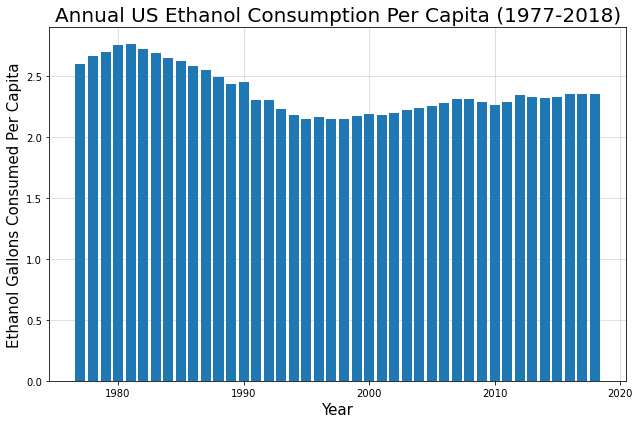

In [151]:
title = 'Annual US Ethanol Consumption Per Capita (1977-2018)'

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plots
x_totals = totals_1977_2018_df['Year']
y_gallons = totals_1977_2018_df['All Drinks (Ethanol Gallons Per Capita)']
ax0 = plt.bar(x_totals, y_gallons, zorder=3)

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Gallons Consumed Per Capita', fontsize=15)

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save plotted figure as .png
# plt.savefig('Images/' + title + '.png', bbox_inches='tight')
# fig0 = ax0.get_figure()
# fig0.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

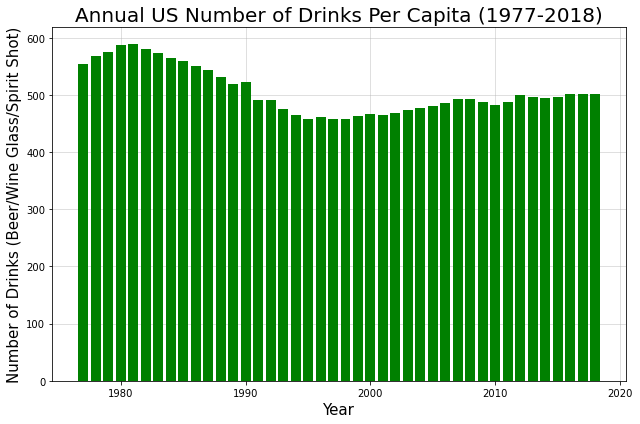

In [15]:
title = 'Annual US Number of Drinks Per Capita (1977-2018)'

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plot
y_drinks = totals_1977_2018_df['Total Number of Drinks']
plt.bar(x_totals, y_drinks, zorder=3, color='green')

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Drinks (Beer/Wine Glass/Spirit Shot)', fontsize=15)

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save plotted figure as .png
# plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

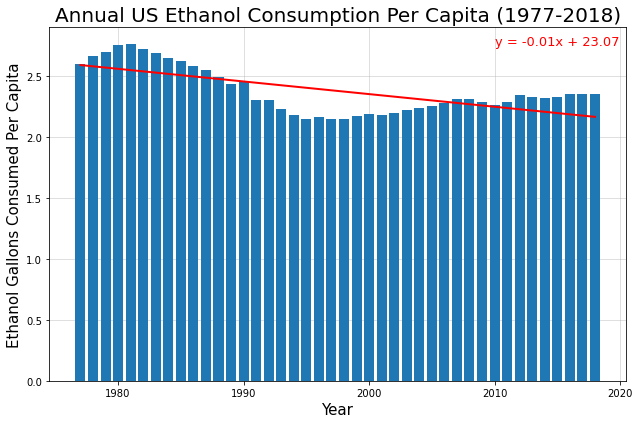

In [163]:
title = 'Annual US Ethanol Consumption Per Capita (1977-2018)'

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plot
plt.bar(x_totals, y_gallons, zorder=3)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_totals, y_gallons)
regress_values = x_totals * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Plot linear regression
plt.plot(x_totals, regress_values, 'red', lw=2, zorder=3)

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Gallons Consumed Per Capita', fontsize=15)

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Annotate
plt.annotate(line_eq, (2010,2.75), color="red", fontsize=13)

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

In [144]:
correlation = st.pearsonr(x_totals, y_gallons)
print(f'R-squared = {round(correlation[0], 2)}')

R-squared = -0.66


* The R-squared value is -0.66 which tells us there is moderate correlation between time and alcohol consumption. The negative value means consumption per capita has decreased over between 1977 to 2018. 
* The correlation is not strong enough to indicate causation, but this does verify a decrease in consumption per capita in recent decades.
* A variety of factors such as health studies/education, economic factors, or laws related to alcohol or other recreational drugs may all play roles in the decreased alcohol consumption per capita. However, we cannot determine causation with any certainty based on the consumption data alone.

In [16]:
print(regions)

ne_reg = regions_df.loc[regions_df['State']=='northeast region']
mw_reg = regions_df.loc[regions_df['State']=='midwest region']
s_reg = regions_df.loc[regions_df['State']=='south region']
w_reg = regions_df.loc[regions_df['State']=='west region']

['northeast region', 'midwest region', 'south region', 'west region']


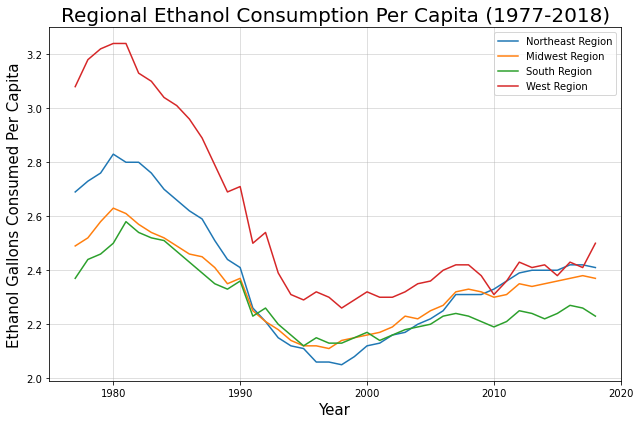

In [17]:
title = 'Regional Ethanol Consumption Per Capita (1977-2018)'

# Size plot first
plt.rcParams["figure.figsize"]=(9,6)

# Plot
plt.plot(ne_reg['Year'], ne_reg['All Drinks (Ethanol Gallons Per Capita)'], zorder=3, label='Northeast Region')
plt.plot(mw_reg['Year'], mw_reg['All Drinks (Ethanol Gallons Per Capita)'], zorder=3, label='Midwest Region')
plt.plot(s_reg['Year'], s_reg['All Drinks (Ethanol Gallons Per Capita)'], zorder=3, label='South Region')
plt.plot(w_reg['Year'], w_reg['All Drinks (Ethanol Gallons Per Capita)'], zorder=3, label='West Region')

# Label
plt.title(title, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Gallons Consumed Per Capita', fontsize=15)
plt.legend(loc='best')

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save plotted figure as .png
# plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

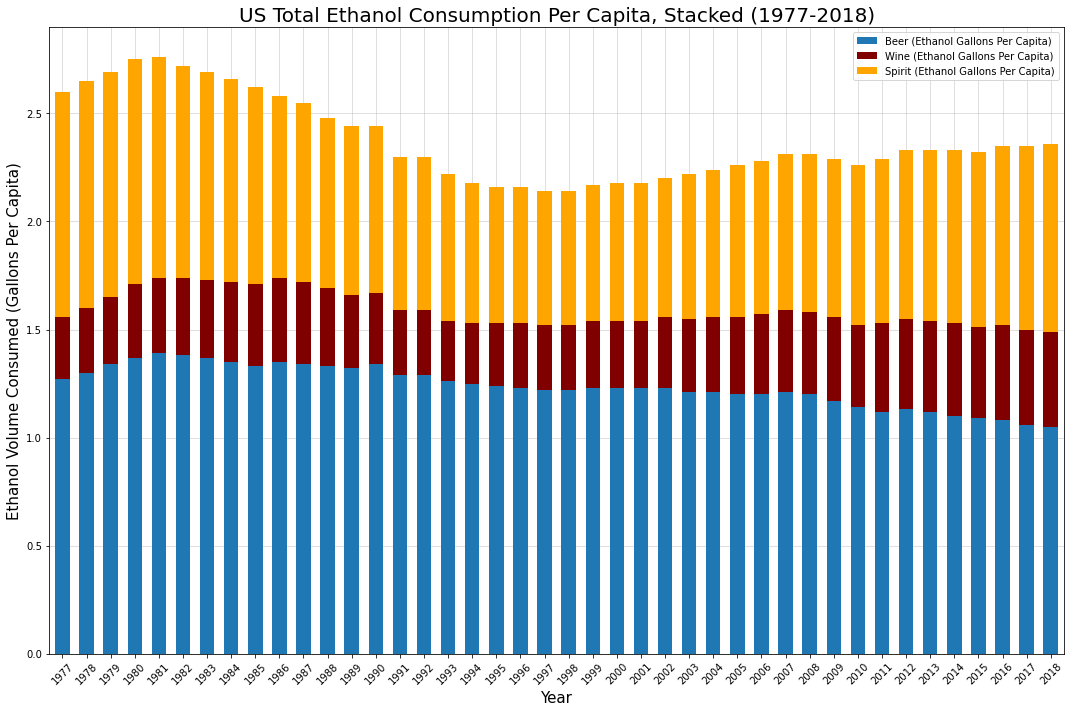

In [129]:
title_ax1 = 'US Total Ethanol Consumption Per Capita, Stacked (1977-2018)'

color = {'Beer (Ethanol Gallons Per Capita)': 'tab:blue', 
         'Wine (Ethanol Gallons Per Capita)': 'maroon', 
         'Spirit (Ethanol Gallons Per Capita)': 'orange'}

type_gallons = ['Beer (Ethanol Gallons Per Capita)', 
                'Wine (Ethanol Gallons Per Capita)', 
                'Spirit (Ethanol Gallons Per Capita)']

# Plot
ax1 = us_totals_df[type_gallons].plot.bar(stacked=True, align='center', rot=45, width=0.6, 
                                          color=color, figsize=(15,10), grid=True, zorder=3)

# Label
plt.title(title_ax1, fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ethanol Volume Consumed (Gallons Per Capita)', fontsize=15)
plt.legend(loc='best')

# Format
plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save plotted figure as .png
fig1 = ax1.get_figure()
fig1.savefig('Images/' + title_ax1 + '.png', bbox_inches='tight')

plt.show()

In [126]:
# Plot



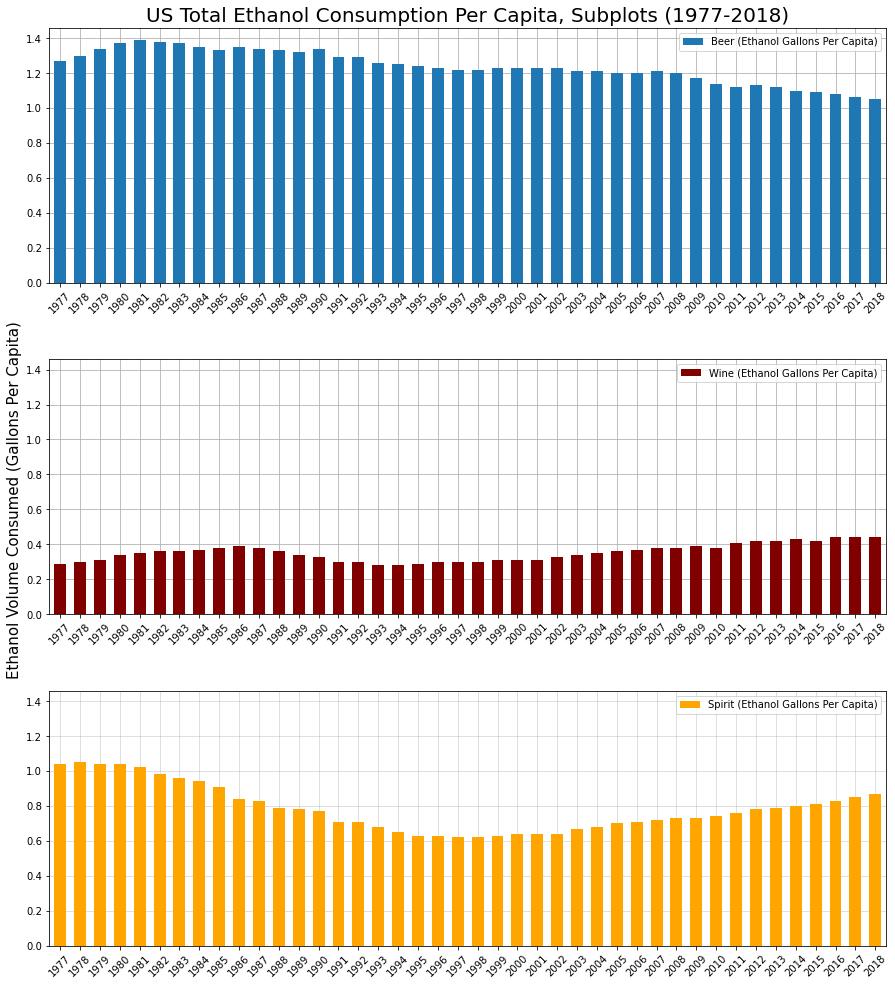

In [137]:
title_ax2 = 'US Total Ethanol Consumption Per Capita, Subplots (1977-2018)'

# Subplot
ax2 = us_totals_df[type_gallons].plot.bar(subplots=True, align='center', width=0.6, color=color, grid=True, rot=45,
                                          sharex=False, sharey=True, figsize=(15,10), zorder=3, xlabel="")

plt.subplots_adjust(top=1.4, hspace=0.3)
ax2[0].set_title('')
ax2[1].set_title('')
ax2[2].set_title('')

# Label
plt.title(title_ax2, fontsize=20, y=3.6)
plt.ylabel('Ethanol Volume Consumed (Gallons Per Capita)', fontsize=15, y=1.75)
plt.legend(loc='best')

# Format
# plt.tight_layout()
plt.grid(zorder=0, alpha=0.5)
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['savefig.facecolor'] = 'w'

# Save plotted figure as .png
plt.savefig('Images/' + title_ax2 + '.png', bbox_inches='tight')

plt.show()

In [ ]:
# Run regression on each alc type

In [ ]:
# Run regression on each alc type

In [ ]:
# Run regression on each alc type

In [140]:
# Heatmap with consumption as weight?
gmaps.configure(api_key=g_key)